In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.models import Sequential

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:
filename=[]
for file in os.listdir('smlimages'):
    filename.append(os.path.join('smlimages',file))

In [3]:
len(filename)

22276

# Importing ResNet50 Model and Configuration

In [4]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

model = Sequential([
    model,
    GlobalMaxPool2D()
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
# Extracting Features from Images

In [6]:
img=image.load_img('1571.jpg',target_size=(224,224))
img_array=image.img_to_array(img)
img_expand_dim=np.expand_dims(img_array, axis=0)
img_preprocess=preprocess_input(img_expand_dim)
result=model.predict(img_preprocess)
norm_result= result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[0.        , 0.        , 0.0215362 , ..., 0.        , 0.        ,
        0.01721493]], dtype=float32)

In [54]:
def extract_features_from_images(image_path, model):
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.applications.resnet50 import preprocess_input
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()


In [8]:
extract_features_from_images(filename[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([ 0.       ,  4.4787574,  0.4362762, ...,  3.1709602,  6.9315863,
       17.540659 ], dtype=float32)

In [9]:
image_features=[]
for file in filename[0:2276]:
    image_features.append(extract_features_from_images(file,model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━

[array([ 0.       ,  4.4787574,  0.4362762, ...,  3.1709602,  6.9315863,
        17.540659 ], dtype=float32),
 array([ 0.      , 10.454601,  0.      , ...,  2.859174,  6.80614 ,
        13.322451], dtype=float32),
 array([ 0.       ,  9.901489 ,  2.0670795, ...,  0.8003056,  0.       ,
        15.344334 ], dtype=float32),
 array([ 0.62462676, 13.534077  ,  2.011714  , ...,  0.93270755,
         9.123123  , 12.283525  ], dtype=float32),
 array([ 0.74512374, 15.154469  ,  0.        , ...,  0.41435504,
         4.93672   , 14.165628  ], dtype=float32),
 array([ 0.       , 30.921259 ,  0.5850024, ...,  0.       ,  8.958216 ,
         8.012806 ], dtype=float32),
 array([ 0.        , 32.90835   ,  3.8775659 , ...,  0.76648116,
        10.728734  , 17.288553  ], dtype=float32),
 array([ 0.       , 27.062078 ,  4.63345  , ...,  0.       ,  1.4862794,
        13.458544 ], dtype=float32),
 array([ 0.        , 27.009638  ,  3.2634678 , ...,  0.20659173,
        12.770873  , 21.677996  ], dtype=fl

In [11]:
Image_features=pkl.dump(image_features, open('Image_features.pkl','wb'))

In [12]:
filename=pkl.dump(filename, open('filename.pkl','wb'))

# Loading PKL files

In [16]:
Image_features=pkl.load(open('Image_features.pkl','rb'))

In [17]:
filename=pkl.load(open('filename.pkl','rb'))

In [18]:
np.array(Image_features).shape

(2276, 2048)

# Finding Similar Images

In [21]:
neighbors=NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [46]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [55]:
input_image=extract_features_from_images('1571.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [56]:
distance,indices=neighbors.kneighbors([input_image])

In [58]:
indices[0]

array([2253, 2271,   83, 1659, 2265, 2254], dtype=int64)

In [59]:
from IPython.display import Image

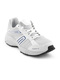

In [60]:
Image('1571.jpg')

In [61]:
filename[indices[0][0]]

'smlimages\\12696.jpg'

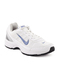

In [64]:
Image(filename[indices[0][0]])

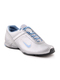

In [65]:
Image(filename[indices[0][1]])

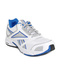

In [66]:
Image(filename[indices[0][2]])

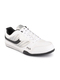

In [67]:
Image(filename[indices[0][3]])

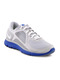

In [68]:
Image(filename[indices[0][4]])